In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('medical_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
df.describe(include = 'all').round(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000,10000,10000,10000,10000,10000,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
unique,NaN,10000,10000,10000,6072,52,1607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,36,553,118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50159.32,38.75,-91.24,...,5312.17,12934.53,3.52,3.51,3.51,3.52,3.50,3.52,3.49,3.51
std,2886.90,NaN,NaN,NaN,NaN,NaN,NaN,27469.59,5.40,15.21,...,2180.39,6542.60,1.03,1.03,1.03,1.04,1.03,1.03,1.02,1.04
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,610.00,17.97,-174.21,...,1938.31,3125.70,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,NaN,NaN,NaN,NaN,NaN,NaN,27592.00,35.26,-97.35,...,3179.37,7986.49,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50207.00,39.42,-88.40,...,5213.95,11573.98,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00
75%,7500.25,NaN,NaN,NaN,NaN,NaN,NaN,72411.75,42.04,-80.44,...,7459.70,15626.49,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [7]:
selected_vars = ['TotalCharge', 'Additional_charges', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten']
selected_df = df[selected_vars].copy()

In kmeans: feature variance = feature influence. StandardScaler transforms each feature to have mean 0 and variance 1. Features are said to be "standardized". 

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(selected_df)

In [9]:
df_scaled = pd.DataFrame(scaled_df, columns=selected_vars)

In [10]:
print(df_scaled.head())

   TotalCharge  Additional_charges    Income  VitD_levels  Doc_visits  \
0    -0.727185            0.765005  1.615914     0.583603    0.944647   
1    -0.513228            0.715114  0.221443     0.483901   -0.967981   
2    -1.319983            0.698635 -0.915870     0.046227   -0.967981   
3    -1.460517            0.009004 -0.026263    -0.687811   -0.967981   
4    -1.467285           -1.408991 -1.377325    -0.260366   -0.011667   

   Full_meals_eaten  
0         -0.993387  
1          0.990609  
2         -0.001389  
3         -0.001389  
4         -0.993387  


In [11]:
df_scaled.to_csv('prepared_medical_data.csv', index=False)

What is unsupervised learning?
1. A group of machine learning algorithms that find patterns in data.
2. Data for algorithms has not been labeled, classified or characterized.
3. The objective of the algorithm is to interpret any structure in the data.
4. Common unsupervised learning algorithms: clustering, neural networks, anomaly detection.

What is clustering?
1. The process of grouping items with similar characteristics.
2. Items in groups similar to each other than in other groups.
3. Example: distance between points on a 2D plane. 

Why do we need to prepare data for clustering?
1. Variables have incomparable units (product dimensions in cm, price in $$$).
2. Variables with same units have vastly different scales and variances (expenditures on cereals, travel).
3. Data in raw form may lead to bias in clustering.
4. Clusters may be heavily dependent on one variable. Solution is to normalize individual variables. 

K-means clustering runs significantly faster on large datasets compared to hierarchical clustering. 

In [12]:
# Declaring variables for use
distortions = []

num_clusters = range (1, 11)

# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df_scaled[['TotalCharge', 'Additional_charges', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten']], i)
    distortions.append(distortion)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


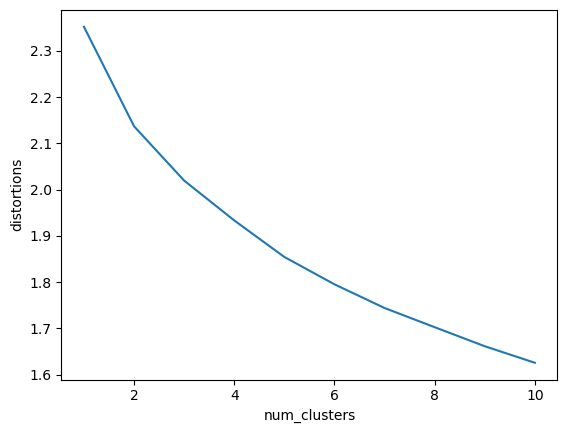

In [13]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)
plt.show()

Inertia measures clustering quality.
- Measures how spread out the clusters are (lower is better).
- Distance from each sample to centroid of its cluster.
- After fit(), available as attribute inertia_.
- k-means attempts to minimize the inertia when choosing clusters.
- More clusters means lower inertia.

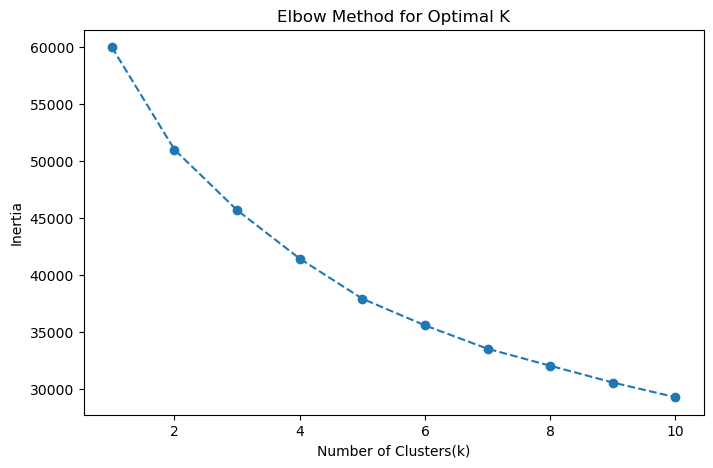

In [14]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Distortion: sum of squared distances of points from cluster centers.

Decreases with an increasing number of clusters.

Becomes zero when the number of clusters equals the number of points.

Elbow plot: line plot between cluster centers and distortion. Elbow plot helps indicate number of clusters present in data.

Elbow plot only gives an indication of optimal k (numbers of clusters). Does not always pinpoint how many k (numbers of clusters). Other methods include average silhouette and gap statistic. 

In [15]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_scaled.head())

   TotalCharge  Additional_charges    Income  VitD_levels  Doc_visits  \
0    -0.727185            0.765005  1.615914     0.583603    0.944647   
1    -0.513228            0.715114  0.221443     0.483901   -0.967981   
2    -1.319983            0.698635 -0.915870     0.046227   -0.967981   
3    -1.460517            0.009004 -0.026263    -0.687811   -0.967981   
4    -1.467285           -1.408991 -1.377325    -0.260366   -0.011667   

   Full_meals_eaten  Cluster  
0         -0.993387        2  
1          0.990609        0  
2         -0.001389        1  
3         -0.001389        1  
4         -0.993387        1  


In [16]:
silhouette_avg = silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.17


In [17]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster_5'] = kmeans.fit_predict(df_scaled)

print(df_scaled.head())

   TotalCharge  Additional_charges    Income  VitD_levels  Doc_visits  \
0    -0.727185            0.765005  1.615914     0.583603    0.944647   
1    -0.513228            0.715114  0.221443     0.483901   -0.967981   
2    -1.319983            0.698635 -0.915870     0.046227   -0.967981   
3    -1.460517            0.009004 -0.026263    -0.687811   -0.967981   
4    -1.467285           -1.408991 -1.377325    -0.260366   -0.011667   

   Full_meals_eaten  Cluster  Cluster_5  
0         -0.993387        2          0  
1          0.990609        0          3  
2         -0.001389        1          4  
3         -0.001389        1          4  
4         -0.993387        1          4  


In [19]:
silhouette_avg_5 = silhouette_score(df_scaled.drop(columns=['Cluster_5']), df_scaled['Cluster_5'])
print(f'Silhouette Score: {silhouette_avg_5:.2f}')

Silhouette Score: 0.23


The Silhouette Score measures the quality of clustering based on how well-separated the clusters are. 

These scores indicate weak clustering, with clusters not well-separated and some points near decision boundaries. The low scores suggest significant cluster overlap. Increasing clusters beyond k=5 doesn't improve separation, suggesting the dataset lacks distinct groupings or K-means may not be optimal. 